To address the limitations of the basic neural network, we can implement a more robust neural network model by adding additional hidden layers. A neural network with more than one hidden layer is known as a deep neural network:

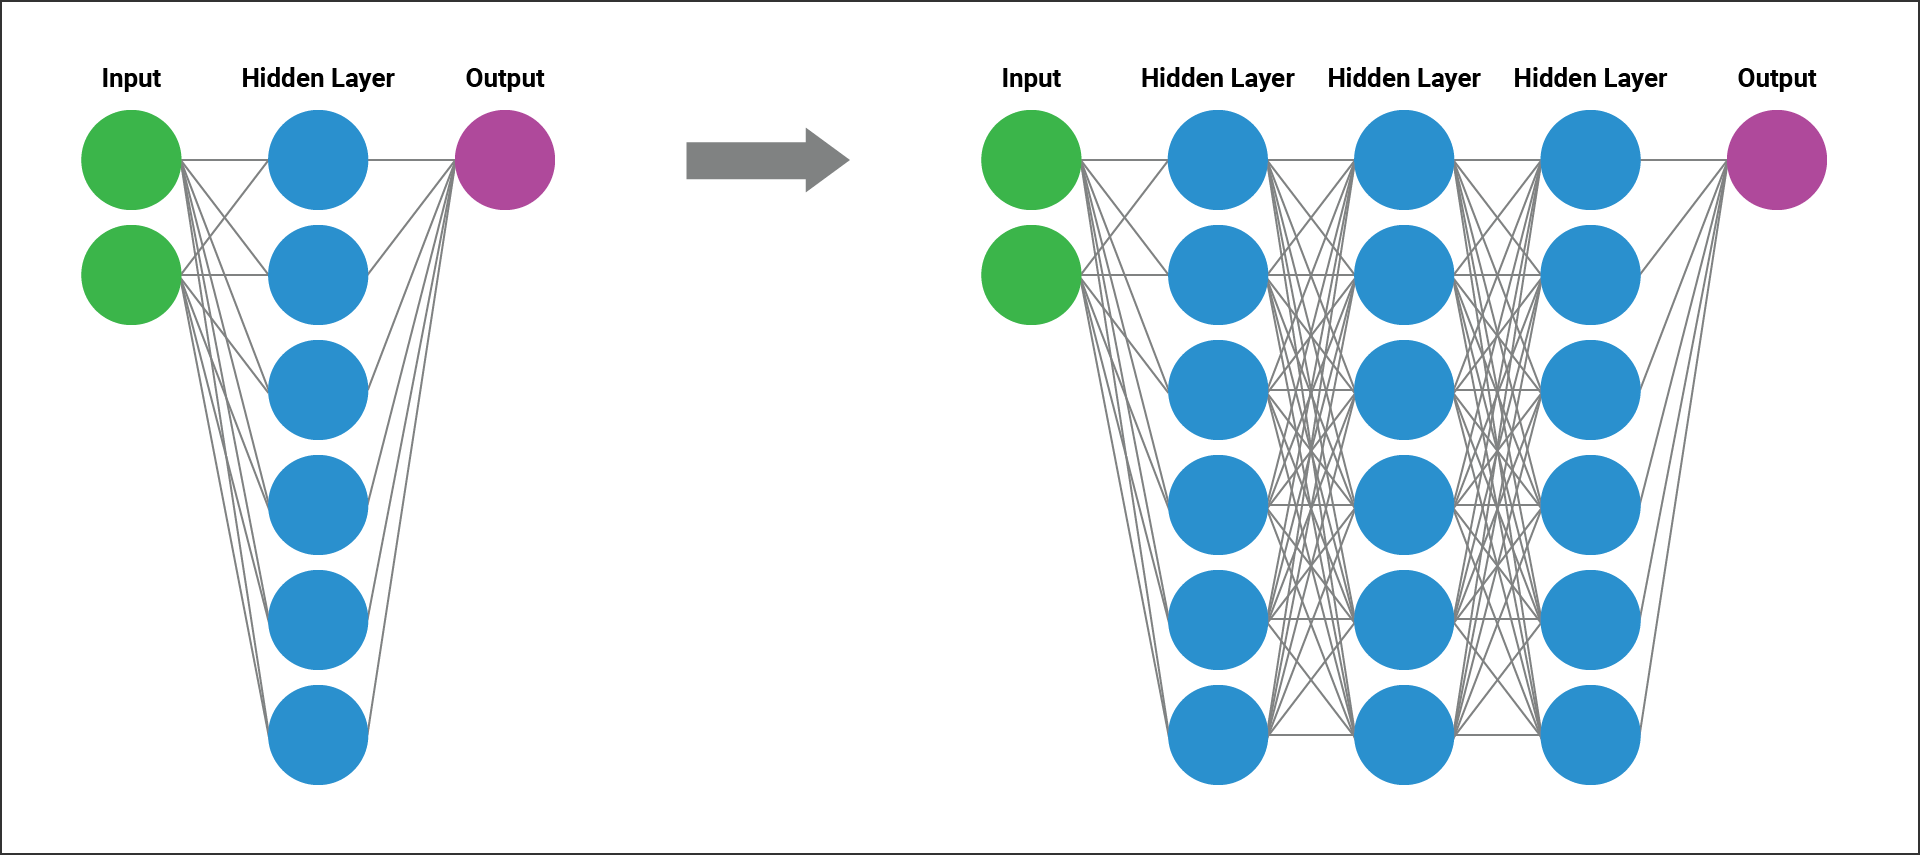

Deep neural networks function similarly to the basic neural network, with one major exception. The outputs of one hidden layer of neurons (that have been evaluated and transformed using an activation function) become the inputs to additional hidden layers of neurons. As a result, the next layer of neurons can evaluate higher order interactions between weighted variables and identify complex, nonlinear relationships across the entire dataset. These additional layers can observe and weight interactions between clusters of neurons across the entire dataset, which means they can identify and account for more information than any number of neurons in a single hidden layer.

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('Resources/HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

Looking at our attrition_cat variable, there are eight categorical variables that need encoding. However, before we loop through our variables and encode them using Scikit-learn's OneHotEncoder module, we need to make sure that none of the categorical variables have more than 10 unique values and require bucketing.

In [5]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

According to the nunique method, none of the categorical variables have more than 10 unique values, which means we're ready to encode. Previously, we have encoded a single variable at a time, but Scikit-learn is flexible enough to perform all of the one-hot encodings at the same time. The only difference from our single variable example is we need to pass our attrition_cat variable list. 

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
#Fit and transform the OneHotEncoder using the categorical variable list
encoded_df = encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))
# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()


,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


To replace these columns, we'll use a combination of Pandas' merge and drop methods.

In [7]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


For our purposes, we want to build a model that will predict whether or not a person is at risk for attrition; therefore, we must separate the "Attrition" columns from the rest of the input data. In fact, because the attrition data is dichotomous (one of two values), we only need to keep the "Attrition_Yes" column—we can ignore the "Attrition_No" column because it is redundant. To separate our features and target as well as perform our training/test split

In [8]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

#split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
#create standardscaler instance 
scaler = StandardScaler()
#fit the standardscaler instance 
X_scaler = scaler.fit(X_train)

#scale the data 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

At last, our data is preprocessed and separated and ready for modelling. For our purposes, we will use the same framework we used for our basic neural network:

For our input layer, we must add the number of input features equal to the number of variables in our feature DataFrame.
In our hidden layers, our deep learning model structure will be slightly different—we'll add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we'll add another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.
In the output layer, we'll use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid activation function will help us predict the probability that an employee is at risk for attrition.

In [10]:
#define the model - deep neural network 
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8 
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()
#first hidden layer 
nn.add(tf.keras.layers.Dense(
    units = hidden_nodes_layer1, input_dim = number_input_features,
    activation = 'relu'))
#second hidden layer 
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, 
                             activation='relu'))
#output layer 
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#check the structure of the model 
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 448       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


Looking at our model summary, we can see that the number of weight parameters (weight coefficients) for each layer equals the number of input values times the number of neurons plus a bias term for each neuron. Our first layer has 55 input values, and multiplied by the eight neurons (plus eight bias terms for each neuron) gives us a total of 448 weight parameters—plenty of opportunities for our model to find trends in the dataset.
If there are eight neurons in the first layer and five neurons in the second layer - eight times five equals 40 parameters, plus five parameters for the bias terms, giving us a total of 45 parameters.

Now it is time to compile our model and define the loss and accuracy metrics. Since we want to use our model as a binary classifier, we'll use the binary_crossentropy loss function, adam optimizer, and accuracy metrics, which are the same parameters we used for our basic neural network.

In [11]:
#compile the model 
nn.compile(loss="binary_crossentropy", metrics = ['accuracy'],
           optimizer='adam')


In [12]:
#train the model 
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 1ms/step - loss: 215.9529 - accuracy: 0.8267
Epoch 2/100
35/35 [==============================] - 0s 1ms/step - loss: 111.5940 - accuracy: 0.8167
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 57.8368 - accuracy: 0.7541
Epoch 4/100
35/35 [==============================] - 0s 953us/step - loss: 29.2512 - accuracy: 0.7341
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 15.9515 - accuracy: 0.7359
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 10.5599 - accuracy: 0.7359
Epoch 7/100
35/35 [==============================] - 0s 980us/step - loss: 7.5661 - accuracy: 0.7922
Epoch 8/100
35/35 [==============================] - 0s 818us/step - loss: 5.9700 - accuracy: 0.8067
Epoch 9/100
35/35 [==============================] - 0s 731us/step - loss: 4.9140 - accuracy: 0.7713
Epoch 10/100
35/35 [==============================] - 0s 986us/step - loss: 4.2553 - accuracy

35/35 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8294
Epoch 83/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8294
Epoch 84/100
35/35 [==============================] - 0s 980us/step - loss: 0.4438 - accuracy: 0.8294
Epoch 85/100
35/35 [==============================] - 0s 886us/step - loss: 0.4444 - accuracy: 0.8294
Epoch 86/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8285
Epoch 87/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8294
Epoch 88/100
35/35 [==============================] - 0s 922us/step - loss: 0.4406 - accuracy: 0.8294
Epoch 89/100
35/35 [==============================] - 0s 733us/step - loss: 0.4428 - accuracy: 0.8285
Epoch 90/100
35/35 [==============================] - 0s 894us/step - loss: 0.4453 - accuracy: 0.8285
Epoch 91/100
35/35 [==============================] - 0s 923us/step - loss: 0.4539 - accuracy: 0.8285
E

In [13]:
#evaluate the model using test data 
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f'Loss: {model_loss} and Accuracy: {model_accuracy}')


12/12 - 0s - loss: 0.3962 - accuracy: 0.8696
Loss: 0.39615556597709656 and Accuracy: 0.8695651888847351


Looking at our deep learning model's performance metrics, the model was able to correctly identify employees who are at risk of attrition approximately 87% of the time. Considering that our input data included more than 30 different variables with more than 1,400 data points, the deep learning model was able to produce a fairly reliable classifier.
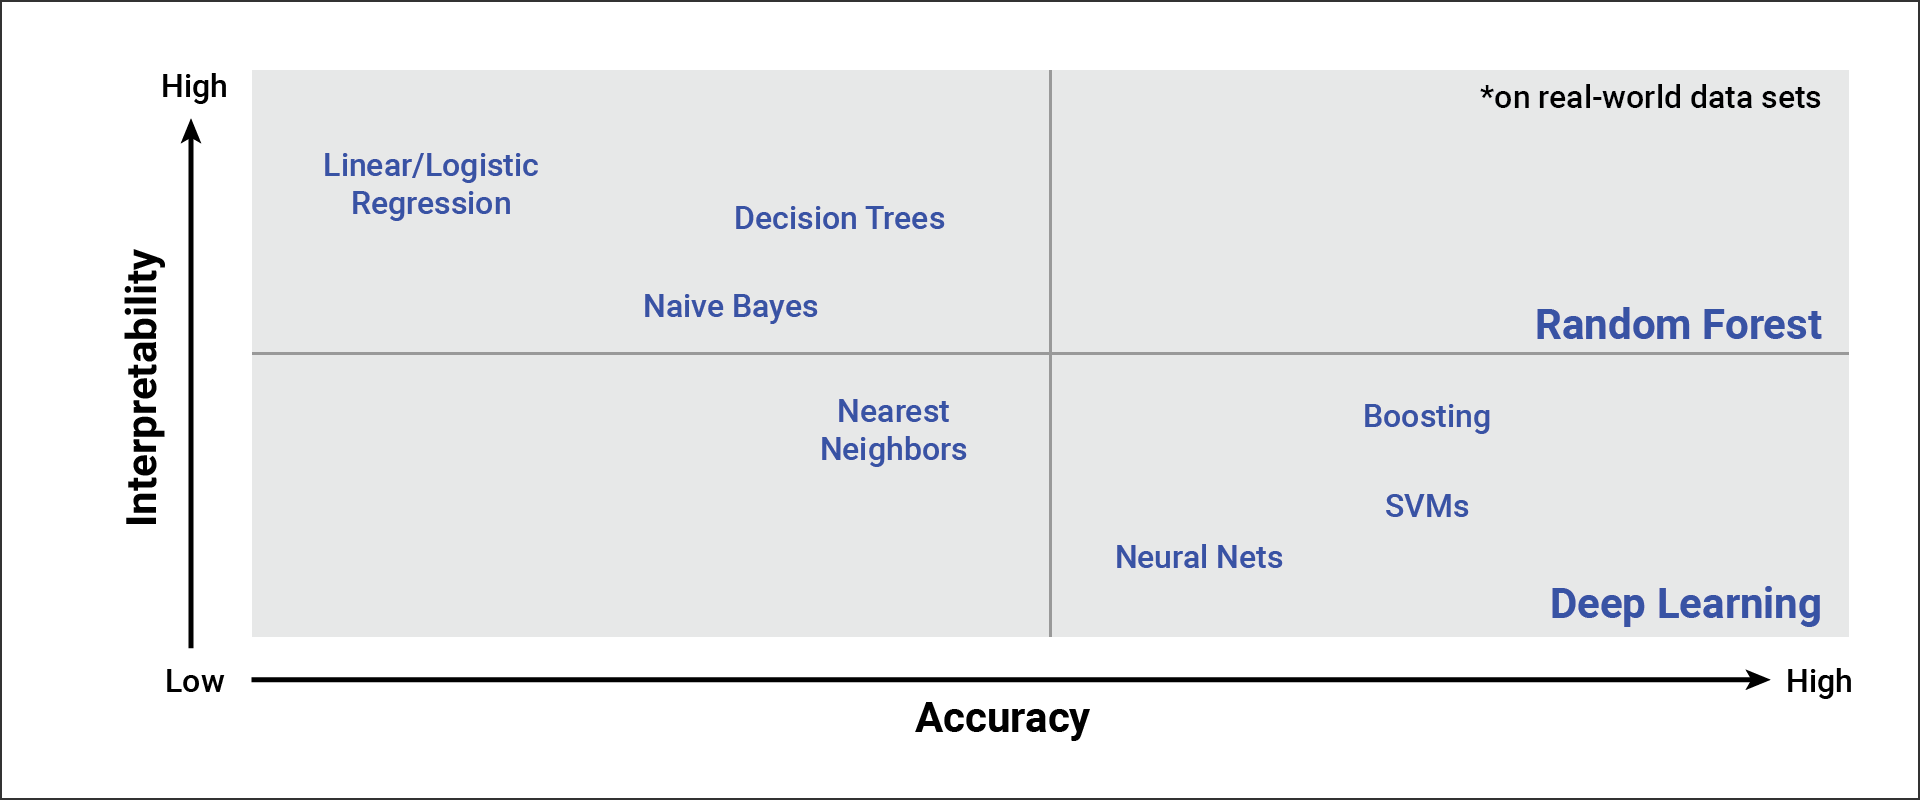

Now that we are familiar with the structure and relative performance of a basic neural network and deep learning models, it is time to learn when and where to use these models. Contrary to what you may believe, neural networks are not the ultimate solution to all data science problems. As shown in the figure above, there are trade-offs to using the new and popular neural network (and deep learning) models over their older, often more lightweight statistics and machine learning counterparts. In this section, we'll discuss three popular regression/classification algorithms and compare them to a neural network alternative.

A logistic regression model is a classification algorithm that can analyze continuous and categorical variables. Using a combination of input variables, logistic regression predicts the probability of the input data belonging to one of two groups. If the probability is above a predetermined cutoff, the sample is assigned to the first group, otherwise it is assigned to the second. For example, using an applicant's personal information (such as age and income), logistic regression could be used by a bank to determine if a person does or does not qualify for a credit card.

A statistical model that mathematically determines its probability of belonging to one of two groups. 

At the heart of the logistic regression model is the sigmoid curve, which is used to produce the probability (between 0 and 1) of the input data belonging to the first group. This sigmoid curve is the exact same curve used in the sigmoid activation function of a neural network. In fact, a basic neural network using the sigmoid activation function is effectively a logistic regression model:
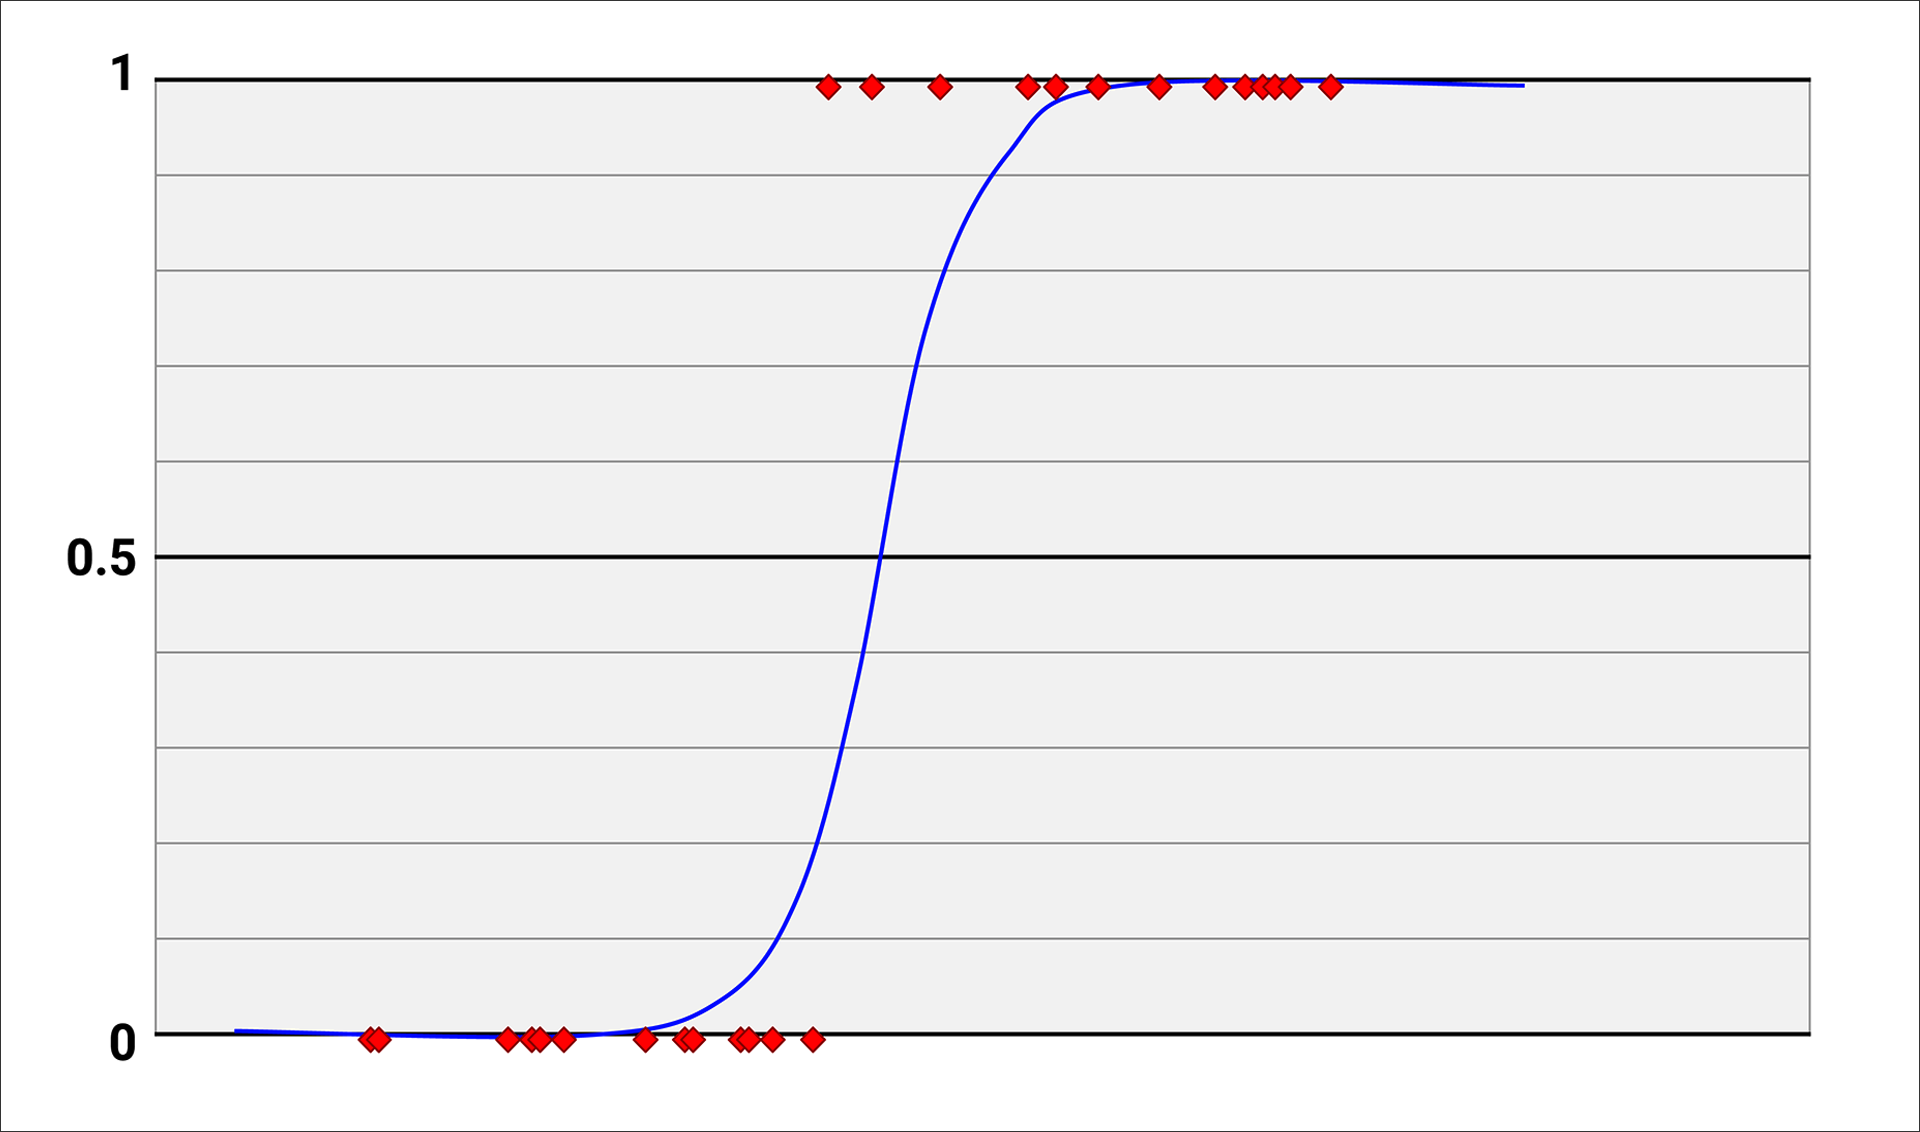

In [14]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
#define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

Once we have defined the file structure and filepath, we need to create a callback object for our deep learning model. A callback object is used in the Keras module to define a set of functions that will be applied at specific stages of the training process.There are a number of different callback functions available that can create log files, force training to stop, send training status messages, or in our case save model checkpoints. To create an effective checkpoint callback using the ModelCheckpoint method, we need to provide the following parameters:

filepath=checkpoint_path—the checkpoint directory and file structure we defined previously
verbose=1—we'll be notified when a checkpoint is being saved to the directory
save_weights_only=True—saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimal space
save_freq='epoch'—checkpoints will be saved every epoch

In [15]:
#compile the model 
nn.compile(loss="binary_crossentropy", optimizer='adam',
          metrics=['accuracy'])
#Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,
                   callbacks=[cp_callback])
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,
                                         y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
35/35 [==============================] - 0s 933us/step - loss: 0.5437 - accuracy: 0.8203

Epoch 00001: saving model to checkpoints/weights.01.hdf5
Epoch 2/100
35/35 [==============================] - 0s 890us/step - loss: 0.5041 - accuracy: 0.8249

Epoch 00002: saving model to checkpoints/weights.02.hdf5
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.8258

Epoch 00003: saving model to checkpoints/weights.03.hdf5
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8267

Epoch 00004: saving model to checkpoints/weights.04.hdf5
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8276

Epoch 00005: saving model to checkpoints/weights.05.hdf5
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8285

Epoch 00006: saving model to checkpoints/weights.06.hdf5
Epoch 7/100
35/35 [==============================] - 0

35/35 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9301

Epoch 00053: saving model to checkpoints/weights.53.hdf5
Epoch 54/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9265

Epoch 00054: saving model to checkpoints/weights.54.hdf5
Epoch 55/100
35/35 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9292

Epoch 00055: saving model to checkpoints/weights.55.hdf5
Epoch 56/100
35/35 [==============================] - 0s 1ms/step - loss: 0.2002 - accuracy: 0.9292

Epoch 00056: saving model to checkpoints/weights.56.hdf5
Epoch 57/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1988 - accuracy: 0.9328

Epoch 00057: saving model to checkpoints/weights.57.hdf5
Epoch 58/100
35/35 [==============================] - 0s 1ms/step - loss: 0.1976 - accuracy: 0.9292

Epoch 00058: saving model to checkpoints/weights.58.hdf5
Epoch 59/100
35/35 [==============================] - 0s 1ms/step

Now if we ever need to restore weights, we can use the Keras Sequential model's load_weights method to restore the model weights. To test this functionality, let's define another deep learning model, but restore the weights using the checkpoints rather than training the model.

In [22]:
#define the model - deep neural network 
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: Cannot assign to variable dense_12/kernel:0 due to variable shape (55, 24) and value shape (55, 8) are incompatible

In [23]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [24]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [25]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.6363 - accuracy: 0.6386
Loss: 0.6362500786781311, Accuracy: 0.6385869383811951
